In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Условие 1: Задача 1

### 1.1. Скачать следующие данные: kc-house-data и laptop_price

In [2]:
# Считываем датасет
df = pd.read_csv('kc-house-data.csv', sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2. Изучите стоимости недвижимости

In [3]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [4]:
df['price1'] = df['price']/100000
df['price1'].describe()

count    21613.000000
mean         5.400881
std          3.671272
min          0.750000
25%          3.219500
50%          4.500000
75%          6.450000
max         77.000000
Name: price1, dtype: float64

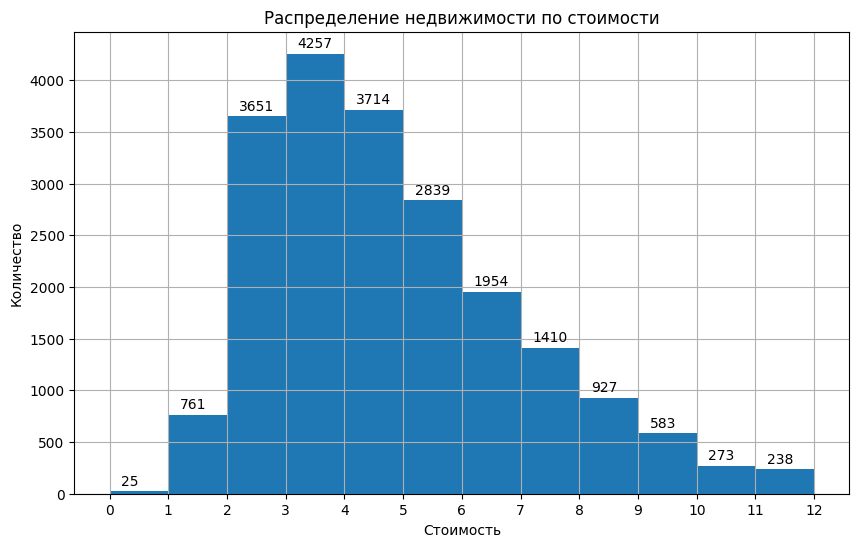

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df['price1'], bins=range(0, 13, 1))
ax.xaxis.set_major_locator(plt.IndexLocator(base = 1, offset = 0))
ax.grid()
for i in ax.patches:
    ax.annotate('%1.0f'%(i.get_height()), (i.get_x()+0.2, i.get_height() + 60))
plt.title('Распределение недвижимости по стоимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.show()

#### Вывод: самое большое количество домов имеют цену 3 - 4 млн. рублей количество таких домов составляет 4257

### 1.4. Изучите распределение года постройки

In [6]:
df['yr_built'].describe()

count    21613.000000
mean      1971.005136
std         29.373411
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

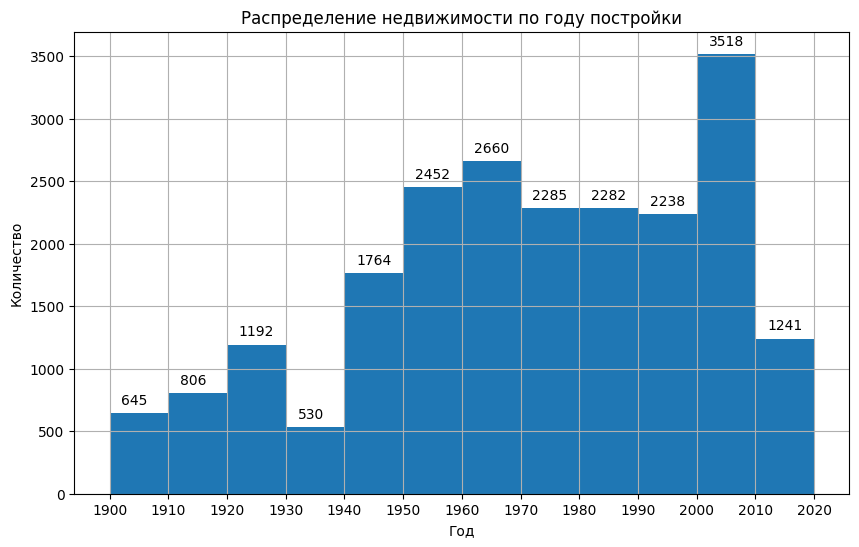

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df['yr_built'], bins = range(1900, 2030, 10))
ax.xaxis.set_major_locator(plt.IndexLocator(base = 10, offset = 0))
ax.grid()
for i in ax.patches:
    ax.annotate('%1.0f'%(i.get_height()), (i.get_x() + 2, i.get_height() + 70))
plt.title('Распределение недвижимости по году постройки')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

#### Вывод: самое большое количество недвижимости было построено в период с 2000 по 2010 год - 3518

In [15]:
n, bins, patches = ax.hist(df['yr_built'], bins = range(1900, 2030, 10))
n, bins, patches

(array([ 645.,  806., 1192.,  530., 1764., 2452., 2660., 2285., 2282.,
        2238., 3518., 1241.]),
 array([1900., 1910., 1920., 1930., 1940., 1950., 1960., 1970., 1980.,
        1990., 2000., 2010., 2020.]),
 <BarContainer object of 12 artists>)

## Условие 2: 2 задача

### 2.1. Изучите распределение домов от наличия вида на набережную


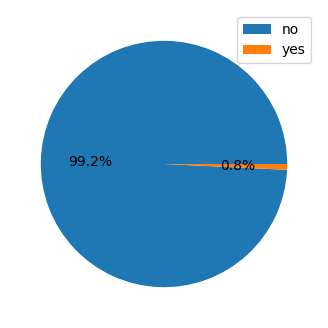

In [25]:
data = df['waterfront'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%')
plt.legend(['no', 'yes']);

#### Вывод: количество домов с видом на набережную составляет всего 0,8%

### 2.2. Изучите распределение этажей домов

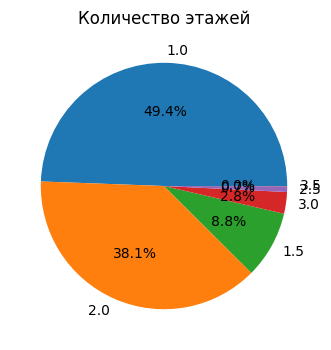

In [9]:
data = df['floors'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%', labels=data.index)
plt.title('Количество этажей');

#### Вывод: большую долю недвижимости составляют одноэтажные и духэтажные сооружения, 49.4% и 38.1% соответственно

### 2.3. Изучите распределение состояния домов

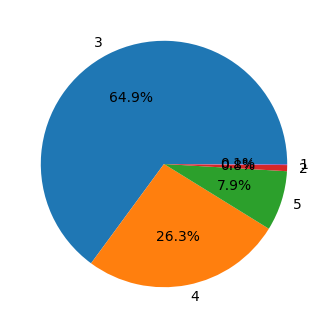

In [10]:
data = df['condition'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%', labels=data.index);

#### Вывод: большая доля недвижимости находится в удовлетворительном состоянии 64.9%

## Условие 3: 3 задача

### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
### Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [11]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price1
id,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
price,0.0,1.00,0.31,0.53,0.70,0.00,0.00,0.0,0.4,0.00,...,0.61,0.32,0.00,0.0,0.00,0.31,0.00,0.59,0.00,1.00
bedrooms,0.0,0.31,1.00,0.52,0.58,0.00,0.00,0.0,0.0,0.00,...,0.48,0.30,0.00,0.0,0.00,0.00,0.00,0.39,0.00,0.31
bathrooms,0.0,0.53,0.52,1.00,0.75,0.00,0.50,0.0,0.0,0.00,...,0.69,0.00,0.51,0.0,0.00,0.00,0.00,0.57,0.00,0.53
sqft_living,0.0,0.70,0.58,0.75,1.00,0.00,0.35,0.0,0.0,0.00,...,0.88,0.44,0.32,0.0,0.00,0.00,0.00,0.76,0.00,0.70
sqft_lot,0.0,0.00,0.00,0.00,0.00,1.00,0.00,0.0,0.0,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.72,0.00
floors,0.0,0.00,0.00,0.50,0.35,0.00,1.00,0.0,0.0,0.00,...,0.52,0.00,0.49,0.0,0.00,0.00,0.00,0.00,0.00,0.00
waterfront,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.4,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
view,0.0,0.40,0.00,0.00,0.00,0.00,0.00,0.4,1.0,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.40
condition,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,1.00,...,0.00,0.00,-0.36,0.0,0.00,0.00,0.00,0.00,0.00,0.00


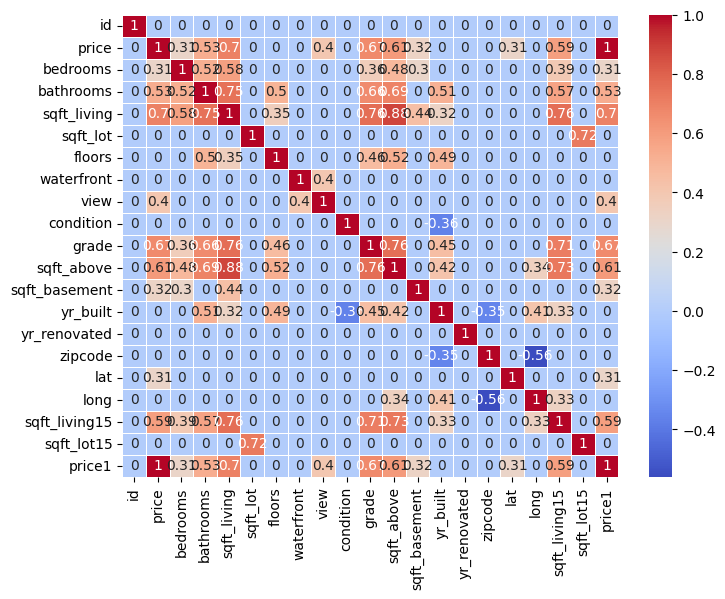

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

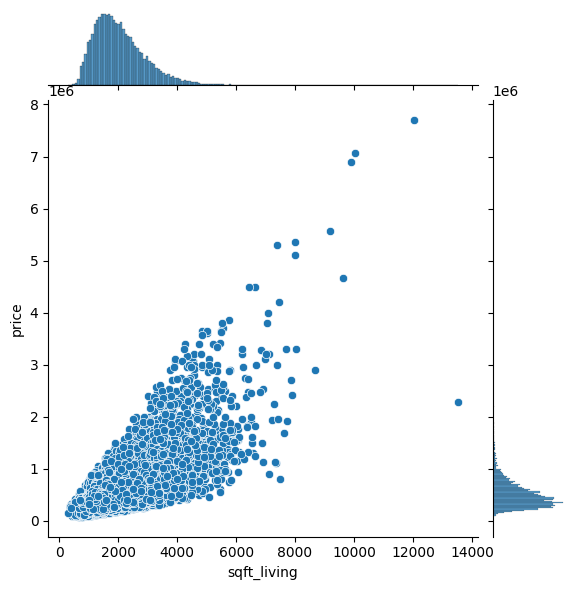

In [13]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='scatter');

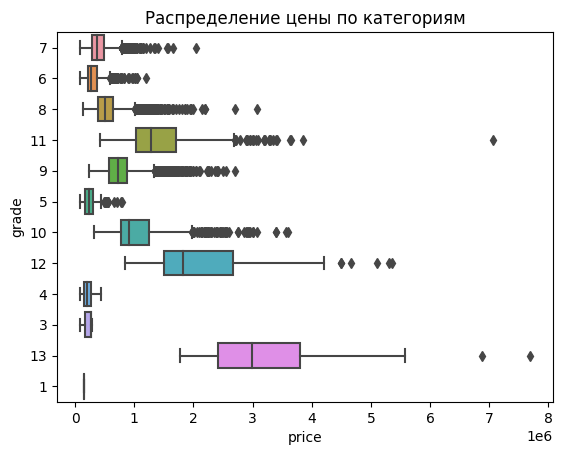

In [27]:
sns.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('grade')
plt.title('Распределение цены по категориям');

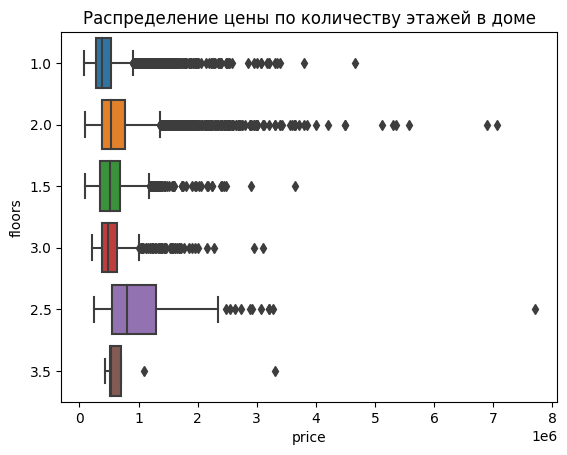

In [28]:
sns.boxplot(x=df['price'], y=df['floors'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('floors')
plt.title('Распределение цены по количеству этажей в доме');

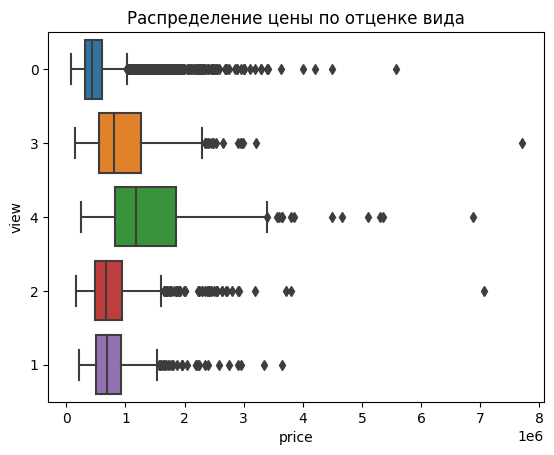

In [29]:
sns.boxplot(x=df['price'], y=df['view'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('view')
plt.title('Распределение цены по оценке вида');

#### Вывод: на стоимость недвижимости влияют такие характеристики как оценка вида, количество этажей в доме, качество конструкции и жилплощадь. Самыми дорогостоящими домами являются дома с жилой площадью от 6000 до 8000, высоким качеством конструкции и дизайна, количеством этажей 2.5 и отценкой вида 4.